In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


## Aula 1

In [2]:

filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")

In [113]:
filmes.columns = ['filmeId', 'titulo', 'genero']
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
avaliacao = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/ratings.csv")
avaliacao.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
avaliacao.shape

(100836, 4)

In [6]:
len(avaliacao)

100836

In [7]:
avaliacao.columns = ['usuarioId', 'filmeId', 'Nota', 'Momento']
avaliacao.head()

,usuarioId,filmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
avaliacao.describe()

,usuarioId,filmeId,Nota,Momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
avaliacao_filme_1 = avaliacao.query("filmeId==1")
avaliacao_filme_1

,usuarioId,filmeId,Nota,Momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [14]:
notas_medias_por_filmes = avaliacao.groupby("filmeId")['Nota'].mean()
notas_medias_por_filmes.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

In [15]:
filmes_com_media = filmes.join(notas_medias_por_filmes, on="filmeId")
filmes_com_media.head()

,filmeId,titulo,genero,Nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


In [17]:
filmes_com_media.sort_values("Nota", ascending=False).head(15)

,filmeId,titulo,genero,Nota
7656,88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,5.0
8107,100556,"Act of Killing, The (2012)",Documentary,5.0
9083,143031,Jump In! (2007),Comedy|Drama|Romance,5.0
9094,143511,Human (2015),Documentary,5.0
9096,143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,5.0
4251,6201,Lady Jane (1986),Drama|Romance,5.0
8154,102217,Bill Hicks: Revelations (1993),Comedy,5.0
8148,102084,Justice League: Doom (2012),Action|Animation|Fantasy,5.0
4246,6192,Open Hearts (Elsker dig for evigt) (2002),Romance,5.0
9122,145994,Formula of Love (1984),Comedy,5.0


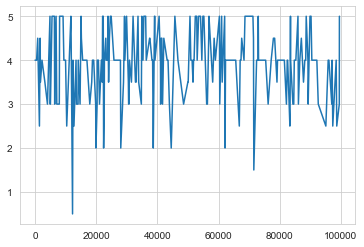

In [20]:
avaliacao.query("filmeId == 1")["Nota"].plot()

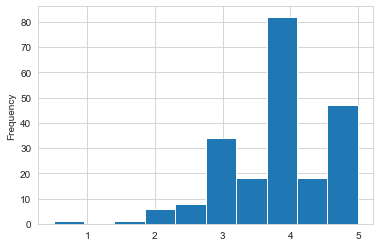

In [21]:
avaliacao.query("filmeId == 1")["Nota"].plot(kind='hist')

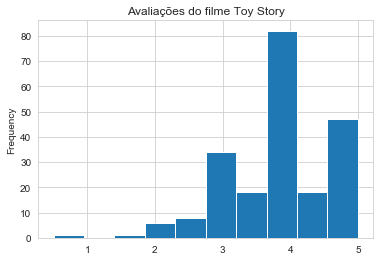

In [22]:
avaliacao.query("filmeId == 1")["Nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Story")

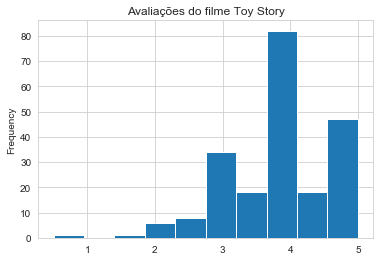

In [23]:
avaliacao.query("filmeId == 1")["Nota"].plot(kind='hist')
plt.title("Avaliações do filme Toy Story")
plt.show()

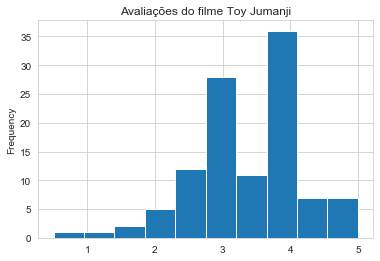

In [24]:
avaliacao.query("filmeId == 2")["Nota"].plot(kind='hist',
                                              title="Avaliações do filme Toy Jumanji")

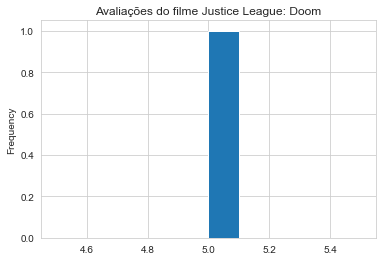

In [25]:
avaliacao.query("filmeId == 102084")["Nota"].plot(kind='hist',
                                                   title="Avaliações do filme Justice League: Doom")

## Desafios

# desafio 1
## O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou? Determine quantos filmes não tem avaliações e quais são esses filmes.

In [27]:

total_null = filmes_com_media['Nota'].isnull().sum()
print(total_null)
select = filmes_com_media['Nota'].isnull()
filmes_com_media[select]

18


,filmeId,titulo,genero,Nota
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


# desafio 2 do Guilherme Silveira
## Mudar o nome da coluna nota do dataframe filmes_com_media para nota_média após o join

In [29]:
notas_medias_por_filme = avaliacao.groupby("filmeId")["Nota"].mean()
filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
filmes_com_media = filmes_com_media.rename(columns={'Nota': 'nota_media'})
filmes_com_media.head()

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


# desafio 3,4
## Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.
## Arredondar as médias (coluna de nota média) para duas casas decimais.

In [31]:


notas_medias_por_filme = avaliacao.groupby("filmeId")["Nota"].mean()
total_votos_por_filme = avaliacao.groupby("filmeId")['usuarioId'].count()

filmes_com_media = filmes.join(notas_medias_por_filme, on="filmeId")
df_final = filmes_com_media.join(total_votos_por_filme,on="filmeId")

df_final.columns = ['filmeId','titulo','generos','nota_media','total_votos']
df_final = df_final.round({'nota_media': 0})
df_final.head()


,filmeId,titulo,generos,nota_media,total_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,4.0,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.0,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.0,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.0,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.0,49.0


# desafio 5
## Descobrir os generos dos filmes (quais são eles, únicos)

In [32]:
generos_df = df_final.generos.str.get_dummies('|')
generos = generos_df.columns.to_list()
generos

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

# Desafio 6
## Contar o número de aparições de cada genero

In [33]:
total_filmes_por_genero = df_final.generos.str.get_dummies().sum().sort_values(ascending=False)
total_filmes_por_genero


Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

# Desafio 7
## Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

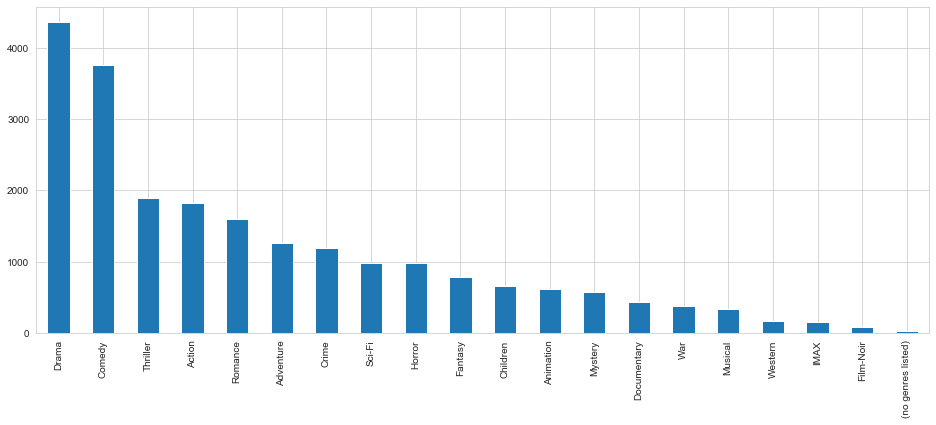

In [34]:
total_filmes_por_genero.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6))

# Aula 2

In [35]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).head()

Drama       4361
Comedy      3756
Thriller    1894
Action      1828
Romance     1596
dtype: int64

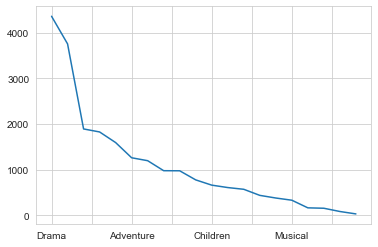

In [36]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot()

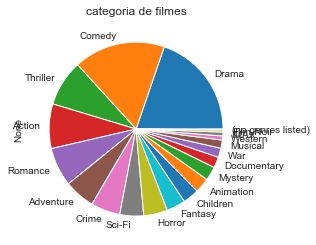

In [37]:
# Nao recomendado
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='pie', title='categoria de filmes')

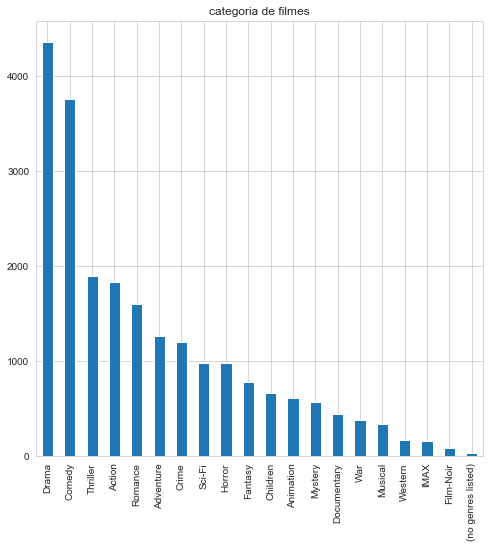

In [38]:
filmes['genero'].str.get_dummies('|').sum().sort_values(ascending=False).plot(kind='bar', title='categoria de filmes', figsize=(8, 8))

In [39]:
filmes['genero'].str.get_dummies('|').sum().sort_index(ascending=True)

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

In [41]:
filmes_com_media.sort_values('Nota', ascending=False)[2450:2500]


,filmeId,titulo,genero,Nota
745,973,Meet John Doe (1941),Comedy|Drama,3.900000
6632,56251,Futurama: Bender's Big Score (2007),Animation|Comedy|Sci-Fi,3.900000
101,116,Anne Frank Remembered (1995),Documentary,3.900000
5719,27846,"Corporation, The (2003)",Documentary,3.900000
802,1050,Looking for Richard (1996),Documentary|Drama,3.900000
3983,5617,Secretary (2002),Comedy|Drama|Romance,3.900000
1323,1785,King of New York (1990),Crime|Thriller,3.900000
7103,70599,"Time Traveler's Wife, The (2009)",Drama|Romance|Sci-Fi,3.900000
5248,8607,Tokyo Godfathers (2003),Adventure|Animation|Drama,3.900000
4677,6985,"Passion of Joan of Arc, The (Passion de Jeanne...",Drama,3.900000


In [42]:
def plot_filme(n):
    nota_filme = avaliacao.query(f"filmeId=={n}")['Nota']
    nota_filme.plot(kind='hist')
    plt.show()
    nota_filme.plot.box()
    plt.show()
    return nota_filme.describe()

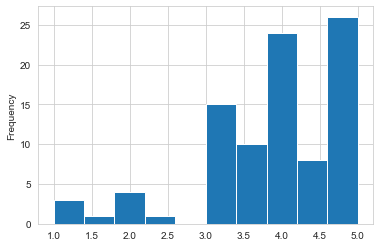

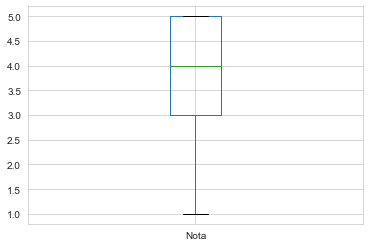

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Nota, dtype: float64

In [43]:
plot_filme(919)

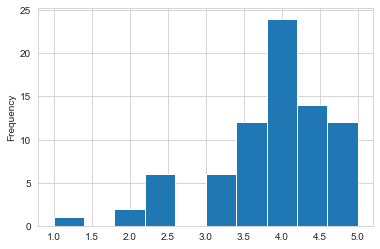

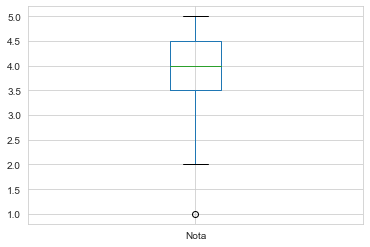

count    77.000000
mean      3.883117
std       0.842522
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: Nota, dtype: float64

In [44]:
plot_filme(46578)

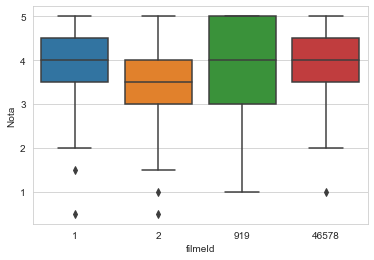

In [45]:
sns.boxplot(data = avaliacao.query("filmeId in [1, 2, 919, 46578]"), x='filmeId', y='Nota')

# Desafio 1
## Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

In [ ]:
import matplotlib.pyplot as plt

In [62]:
def plot_dataframe(data_frame):
    plt.figure(figsize = (16,8))
    ax = sns.barplot(x=data_frame.index,
            y=data_frame.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(data_frame) + 4))

    plt.xticks(rotation=45)
    plt.show()

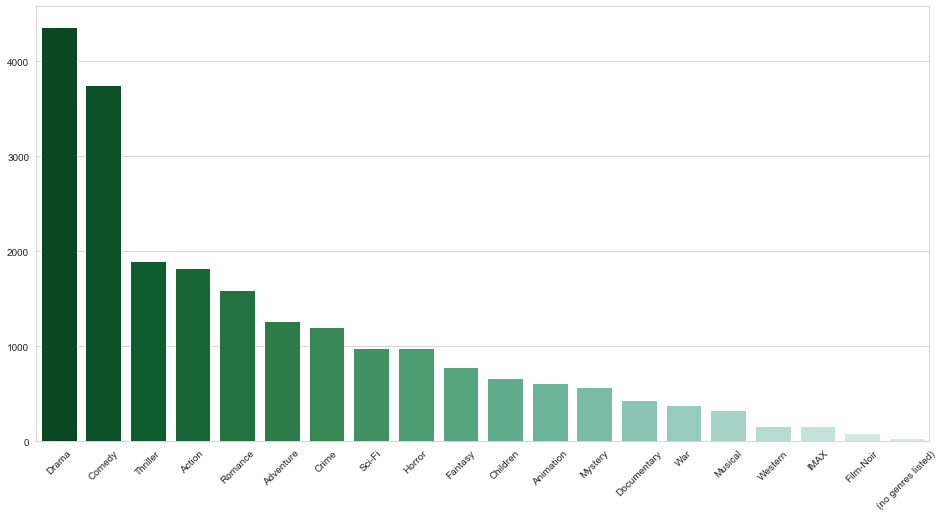

In [69]:
filmes_por_genero = filmes["genero"].str.get_dummies('|').sum().sort_values(ascending=False)

plot_dataframe(filmes_por_genero)

# Desafio 2
## Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar

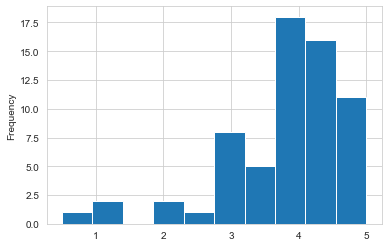

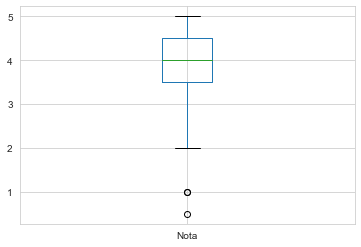

count    64.000000
mean      3.898438
std       1.008612
min       0.500000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: Nota, dtype: float64

In [51]:
plot_filme(55820) # No Country for Old Men (2007)

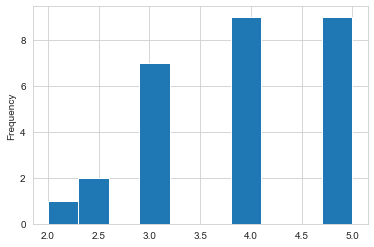

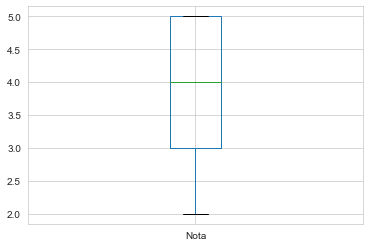

count    28.000000
mean      3.892857
std       0.946310
min       2.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Nota, dtype: float64

In [52]:
plot_filme(2150) # Gods Must Be Crazy, The (1980)

# Desafio 3 do Paulo Silveira
## Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

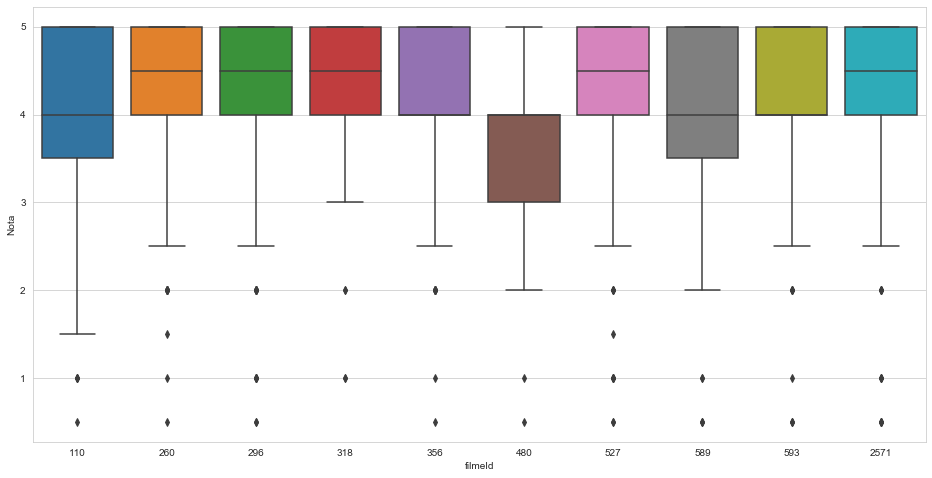

In [109]:
contagem_filmes = avaliacao.groupby("filmeId").count().sort_values("Nota", ascending=False)["Nota"]
top10 = contagem_filmes.head(10).index

plt.figure(figsize=(16, 8))
sns.boxplot(data = avaliacao.query("filmeId in @top10"), x ="filmeId", y="Nota")

# Desafio 4 do Guilherme Silveira
## Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.


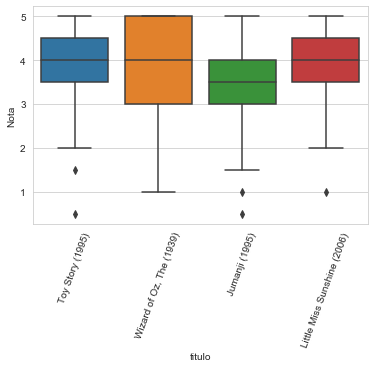

In [119]:
avaliacoes_nomes = avaliacao.join(filmes[["titulo","filmeId"]].set_index('filmeId')["titulo"],on="filmeId")
avaliacoes_nomes
sns.boxplot(data = avaliacoes_nomes.query("filmeId in [1,2,919,46578]"), x ="titulo", y="Nota")
plt.xticks(rotation=70)
plt.show()

# Desafio 5 do Allan Spadini
## Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [120]:
def explora_filme(filme_id):
    filme = filmes.query(f'filmeId == {filme_id}')
    notas = avaliacao.query(f'filmeId == {filme_id}')['Nota']
    
    print(f'Filme: {filme.iloc[0, 1]}')
    print()
    
    print(f'Moda: {notas.mode().values}')    
    print(f'Média: {notas.mean()}')
    print(f'Mediana: {notas.median()}')
    print('------------')

In [121]:
explora_filme(8387)
explora_filme(89386)
explora_filme(3774)

Filme: Police Academy: Mission to Moscow (1994)

Moda: [0.5]
Média: 0.8
Mediana: 0.5
------------
Filme: Pearl Jam Twenty (2011)

Moda: [0.5]
Média: 0.5
Mediana: 0.5
------------
Filme: House Party 2 (1991)

Moda: [0.5 1. ]
Média: 0.75
Mediana: 0.75
------------


## Desafio 6
## Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


In [128]:
def plot_filme_lado(n):
    nota_filme = avaliacao.query(f"filmeId=={n}")['Nota']
    f, axes = plt.subplots(1, 2, figsize=(16, 6))
    nota_filme.plot(kind='hist', ax=axes[0])
    nota_filme.plot(kind='box', ax=axes[1])
    plt.show()

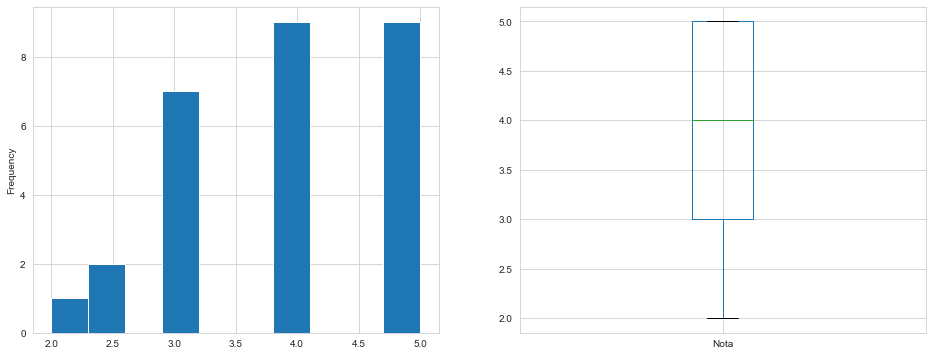

In [129]:
plot_filme_lado(2150)

## Desafio 7
## Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

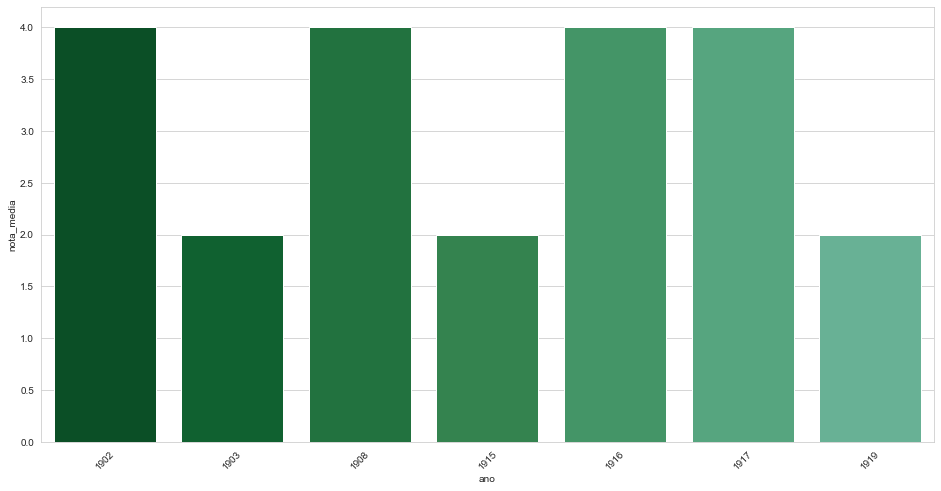

In [151]:
filmes_com_media_e_ano = df_final.copy()
filmes_com_media_e_ano['ano'] = df_final["titulo"].str.extract("\((\d{4})\)")
filmes_com_media_e_ano = filmes_com_media_e_ano.sort_values(by='ano').dropna()
filmes_com_media_e_ano = filmes_com_media_e_ano.head(10)

plt.figure(figsize = (16,8))
ax = sns.barplot(x=filmes_com_media_e_ano['ano'],
        y=filmes_com_media_e_ano['nota_media'],
        palette=sns.color_palette("BuGn_r", n_colors=len(filmes_com_media_e_ano) + 4))

plt.xticks(rotation=45)
plt.show()